## STEP 1

# Downloading the dataset using the opendatasets Python library

In [56]:
!pip install opendatasets
import opendatasets as od

In [57]:
data_path = "https://www.kaggle.com/singhnproud77/hr-attrition-dataset?select=Final+dataset+Attrition.csv"
od.download(data_path)


Skipping, found downloaded files in ".\hr-attrition-dataset" (use force=True to force download)


## STEP 2

# Importing all necessary libraries 

In [58]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings('ignore')

# Pandas Dataframes: DataFrame is an object for data manipulation. It is a 2D tabular structure, where every row is a dataset entry and columns represent features of data.

In [59]:
df =  pd.read_csv("Final dataset Attrition.csv")

# We can have a look to first few rows of the table using head function

In [60]:
# reading first five datapoints
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [61]:
df.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN
5,19,Yes,Travel_Rarely,Sales,22,Male,3,1,Sales Representative,3,...,14-04-2021,NaN,Work Accident,WFH,1,1,Yes,Job Portal,Part Time,NaN
6,19,Yes,Travel_Frequently,Sales,1,Female,1,1,Sales Representative,1,...,12-01-2021,NaN,Work Accident,WFH,2,2,No,Walk-in,Contract,NaN
7,28,Yes,Travel_Rarely,Research & Development,2,Male,3,1,Laboratory Technician,3,...,30-05-2021,NaN,Work Environment,WFH,0,2,No,Walk-in,Contract,NaN
8,29,No,Travel_Rarely,Sales,2,Male,2,2,Sales Executive,2,...,28-02-2021,NaN,Better Opportunity,OFFICE,5,2,No,Walk-in,Part Time,NaN
9,18,Yes,Travel_Rarely,Research & Development,3,Male,3,1,Laboratory Technician,3,...,06-05-2021,NaN,Work Environment,WFH,5,2,No,Walk-in,FullTime,NaN


In [62]:
#all the columns name
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education',
       'Date_of_Hire', 'Date_of_termination', 'Status_of_leaving',
       'Mode_of_work', 'Leaves', 'Absenteeism', 'Work_accident',
       'Source_of_Hire', 'Job_mode', 'Unnamed: 32'],
      dtype='object')

# Shape Function

In [63]:
#check for the no. of columns & rows
df.shape

(1470, 33)

## Data Types

In [64]:
# Checking the data types of all the columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Higher_Education            object
Date_of_Hire                object
Date_of_termination        float64
Status_of_leaving           object
Mode_of_work                object
Leaves                       int64
Absenteeism         

# Describe function

In [65]:
df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


# isnull Function

In [66]:
df.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1466,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1467,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1468,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


# Missing Data Values

In [67]:
# Checking for null values
df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

## Droping the two columns

In [68]:

df = df.drop(["Date_of_termination","Unnamed: 32"], axis=1)

In [69]:
# new df after removing two columns
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,0,Graduation,21-01-2021,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,0,Graduation,13-03-2021,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,0,Post-Graduation,23-01-2021,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,0,PHD,25-04-2021,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,0,PHD,14-06-2021,Better Opportunity,WFH,5,2,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,...,16,Post-Graduation,05-06-1987,Salary,OFFICE,3,2,No,Job Portal,Part Time
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,...,13,Post-Graduation,20-01-1985,Work Accident,WFH,1,1,No,Walk-in,FullTime
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,...,13,Post-Graduation,17-02-1985,Work Accident,OFFICE,2,1,No,Recruiter,Part Time
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,...,8,PHD,29-06-1984,Work Environment,WFH,2,2,Yes,Job Event,Part Time


In [70]:
## Below are some codes to know about how many categories are there
## for each categorical variable & number of the categories they have

In [71]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [72]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [73]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [74]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [75]:
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [76]:
df["Higher_Education"].value_counts()

Post-Graduation    387
Graduation         367
12th               358
PHD                358
Name: Higher_Education, dtype: int64

In [77]:
df["Status_of_leaving"].value_counts()

Dept.Head             314
Salary                297
Work Environment      290
Work Accident         285
Better Opportunity    284
Name: Status_of_leaving, dtype: int64

In [78]:
df["Mode_of_work"].value_counts()

WFH       768
OFFICE    702
Name: Mode_of_work, dtype: int64

In [79]:
pd.to_datetime(df["Date_of_Hire"])

0      2021-01-21
1      2021-03-13
2      2021-01-23
3      2021-04-25
4      2021-06-14
          ...    
1465   1987-05-06
1466   1985-01-20
1467   1985-02-17
1468   1984-06-29
1469   1981-08-02
Name: Date_of_Hire, Length: 1470, dtype: datetime64[ns]

## Parsing Date in Month and Year

In [80]:
## Parsing Date in Month & year
df['day'] = pd.DatetimeIndex(df['Date_of_Hire']).day
df['year'] = pd.DatetimeIndex(df['Date_of_Hire']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Hire']).month

In [133]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,day,year,month
0,37,1,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,Salary,OFFICE,4,2,No,Job Event,Contract,21,2021,1
1,21,0,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,Work Accident,WFH,5,2,No,Recruiter,Part Time,13,2021,3
2,45,0,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,Dept.Head,WFH,1,3,No,Job Event,Contract,23,2021,1
3,23,0,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,25,2021,4
4,22,0,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,Better Opportunity,WFH,5,2,No,Job Event,Contract,14,2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,Travel_Rarely,Sales,3,Male,2,4,Manager,1,...,Salary,OFFICE,3,2,No,Job Portal,Part Time,6,1987,5
1466,55,0,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,...,Work Accident,WFH,1,1,No,Walk-in,FullTime,20,1985,1
1467,55,0,Travel_Rarely,Sales,26,Male,2,5,Manager,4,...,Work Accident,OFFICE,2,1,No,Recruiter,Part Time,17,1985,2
1468,58,0,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,...,Work Environment,WFH,2,2,Yes,Job Event,Part Time,29,1984,6


## Outliers

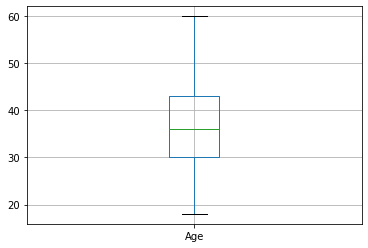

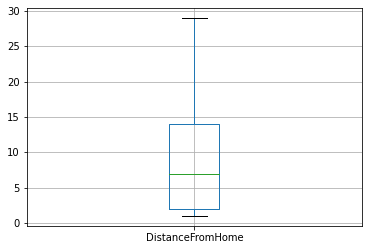

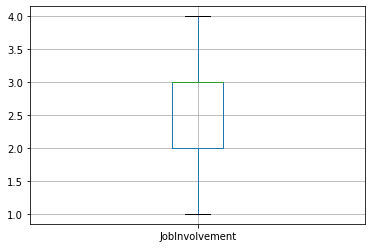

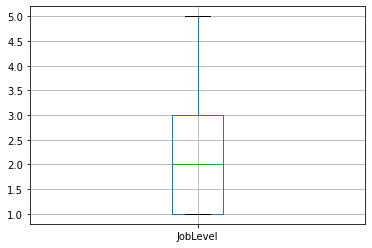

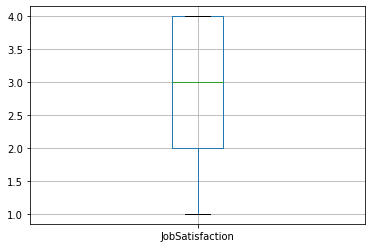

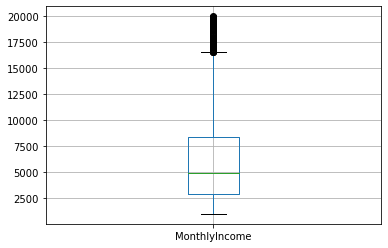

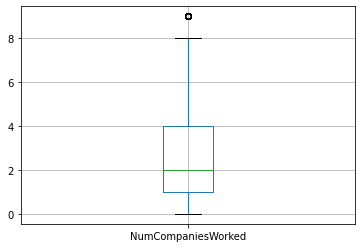

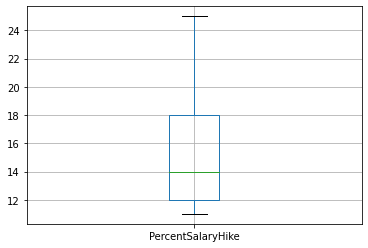

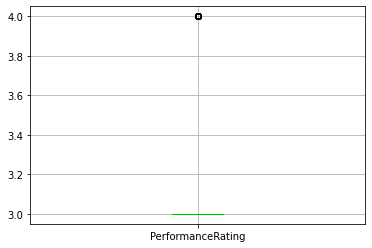

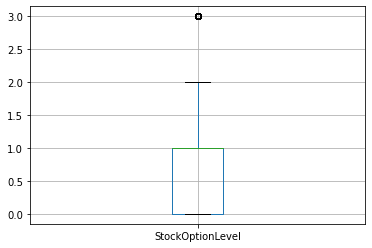

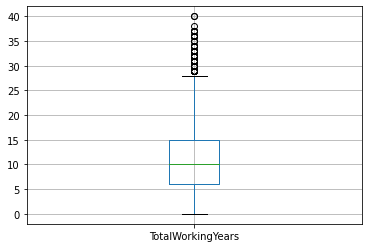

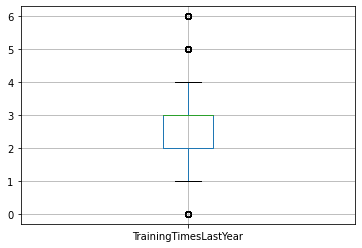

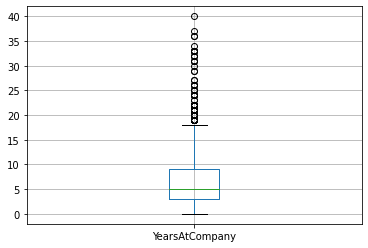

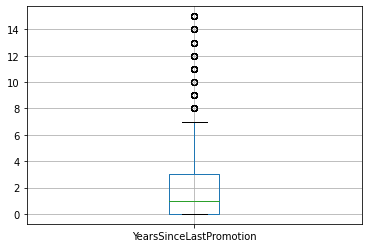

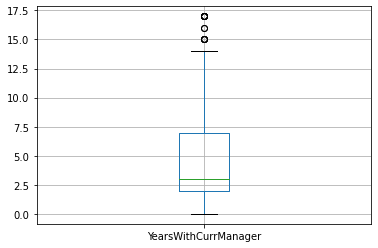

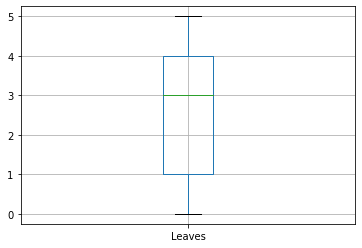

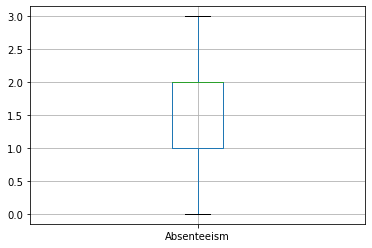

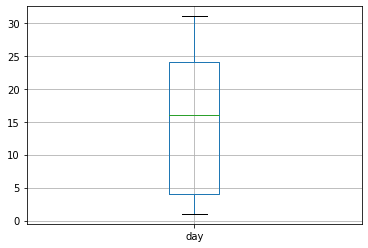

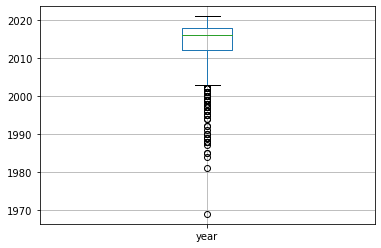

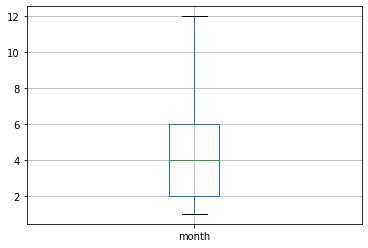

In [81]:
# Outlier detection
df1=df.select_dtypes(exclude=['object'])
for column in df1:
    plt.figure()
    df1.boxplot([column])

## STEP 3

### Basic Statistics

In [82]:
df.corr()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism,day,year,month
Age,1.000000,-0.001686,0.029820,0.509604,-0.004892,0.497855,0.299635,0.003634,0.001904,0.037510,0.680381,-0.019621,0.311309,0.216513,0.202089,0.033811,-0.004628,0.016846,-0.308583,0.017773
DistanceFromHome,-0.001686,1.000000,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.044872,0.004628,-0.036942,0.009508,0.010029,0.014406,-0.022749,0.024581,-0.011663,-0.010388,0.017015
JobInvolvement,0.029820,0.008783,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.021523,-0.005533,-0.015338,-0.021355,-0.024184,0.025976,0.016599,-0.000442,-0.028435,0.024065,-0.043282
JobLevel,0.509604,0.005303,-0.012630,1.000000,-0.001944,0.950300,0.142501,-0.034730,-0.021222,0.013984,0.782208,-0.018191,0.534739,0.353885,0.375281,0.028144,-0.013089,0.038498,-0.531849,0.031760
JobSatisfaction,-0.004892,-0.003669,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,0.020002,0.002297,0.010690,-0.020185,-0.005779,-0.003803,-0.018214,-0.027656,-0.044989,-0.027244,0.018959,0.005697,-0.016303
MonthlyIncome,0.497855,-0.017014,-0.015271,0.950300,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.005408,0.772893,-0.021736,0.514285,0.344978,0.344079,0.002569,-0.018816,0.042598,-0.511451,0.029616
NumCompaniesWorked,0.299635,-0.029251,0.015012,0.142501,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.030075,0.237639,-0.066054,-0.118421,-0.036814,-0.110319,0.019291,-0.010462,0.008197,0.118640,0.023748
PercentSalaryHike,0.003634,0.040235,-0.017205,-0.034730,0.020002,-0.027269,-0.010238,1.000000,0.773550,0.007528,-0.020608,-0.005221,-0.035991,-0.022154,-0.011985,-0.005762,-0.005041,0.003255,0.038847,0.000361
PerformanceRating,0.001904,0.027110,-0.029071,-0.021222,0.002297,-0.017120,-0.014095,0.773550,1.000000,0.003506,0.006744,-0.015579,0.003435,0.017896,0.022827,-0.006077,-0.014931,0.022396,-0.002124,0.011860
StockOptionLevel,0.037510,0.044872,0.021523,0.013984,0.010690,0.005408,0.030075,0.007528,0.003506,1.000000,0.010136,0.011274,0.015058,0.014352,0.024698,0.014579,0.020468,0.008914,-0.015546,0.035536


In [83]:
# description of all numerical items 
# min,max,mean,count are important data displayed using this command
df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism,day,year,month
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,2.568707,1.525170,14.725850,2013.973469,4.692517
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,1.716171,1.097856,9.852366,6.220257,2.941339
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1969.000000,1.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,1.000000,1.000000,4.000000,2012.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,2.000000,16.000000,2016.000000,4.000000
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,2.000000,24.000000,2018.000000,6.000000
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,5.000000,3.000000,31.000000,2021.000000,12.000000


# Mean

In [84]:
print(df.mean())

Age                          36.923810
DistanceFromHome              9.192517
JobInvolvement                2.729932
JobLevel                      2.063946
JobSatisfaction               2.728571
MonthlyIncome              6502.931293
NumCompaniesWorked            2.693197
PercentSalaryHike            15.209524
PerformanceRating             3.153741
StockOptionLevel              0.793878
TotalWorkingYears            11.279592
TrainingTimesLastYear         2.799320
YearsAtCompany                7.008163
YearsSinceLastPromotion       2.187755
YearsWithCurrManager          4.123129
Leaves                        2.568707
Absenteeism                   1.525170
day                          14.725850
year                       2013.973469
month                         4.692517
dtype: float64


# Median 

In [85]:
print(df.median())

Age                          36.0
DistanceFromHome              7.0
JobInvolvement                3.0
JobLevel                      2.0
JobSatisfaction               3.0
MonthlyIncome              4919.0
NumCompaniesWorked            2.0
PercentSalaryHike            14.0
PerformanceRating             3.0
StockOptionLevel              1.0
TotalWorkingYears            10.0
TrainingTimesLastYear         3.0
YearsAtCompany                5.0
YearsSinceLastPromotion       1.0
YearsWithCurrManager          3.0
Leaves                        3.0
Absenteeism                   2.0
day                          16.0
year                       2016.0
month                         4.0
dtype: float64


# Mode

In [86]:
from scipy import stats
print(df.mode())

    Age Attrition BusinessTravel              Department  DistanceFromHome  \
0  35.0        No  Travel_Rarely  Research & Development               2.0   
1   NaN       NaN            NaN                     NaN               NaN   

  Gender  JobInvolvement  JobLevel          JobRole  JobSatisfaction  ...  \
0   Male             3.0       1.0  Sales Executive              4.0  ...   
1    NaN             NaN       NaN              NaN              NaN  ...   

  Status_of_leaving  Mode_of_work  Leaves Absenteeism  Work_accident  \
0         Dept.Head           WFH     4.0         1.0             No   
1               NaN           NaN     NaN         NaN            NaN   

   Source_of_Hire  Job_mode  day    year  month  
0       Recruiter  FullTime  3.0  2016.0    3.0  
1             NaN       NaN  NaN     NaN    NaN  

[2 rows x 34 columns]


# Variance

In [87]:
import statistics
df.var()

Age                        8.345505e+01
DistanceFromHome           6.572125e+01
JobInvolvement             5.063193e-01
JobLevel                   1.225316e+00
JobSatisfaction            1.216270e+00
MonthlyIncome              2.216486e+07
NumCompaniesWorked         6.240049e+00
PercentSalaryHike          1.339514e+01
PerformanceRating          1.301936e-01
StockOptionLevel           7.260346e-01
TotalWorkingYears          6.054056e+01
TrainingTimesLastYear      1.662219e+00
YearsAtCompany             3.753431e+01
YearsSinceLastPromotion    1.038406e+01
YearsWithCurrManager       1.273160e+01
Leaves                     2.945242e+00
Absenteeism                1.205288e+00
day                        9.706911e+01
year                       3.869160e+01
month                      8.651476e+00
dtype: float64

##  Standard Deviation

In [88]:
print(df.std()) # numpy

Age                           9.135373
DistanceFromHome              8.106864
JobInvolvement                0.711561
JobLevel                      1.106940
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
PercentSalaryHike             3.659938
PerformanceRating             0.360824
StockOptionLevel              0.852077
TotalWorkingYears             7.780782
TrainingTimesLastYear         1.289271
YearsAtCompany                6.126525
YearsSinceLastPromotion       3.222430
YearsWithCurrManager          3.568136
Leaves                        1.716171
Absenteeism                   1.097856
day                           9.852366
year                          6.220257
month                         2.941339
dtype: float64


## Normal Distribution



In [89]:
from numpy.linalg import norm 
print(norm(df['Age']))


1458.3367238055826


##  Uniform Distribution

In [90]:
from scipy.stats import uniform 
print(np.random.uniform(df['Age']))

[ 3.35832223 18.82480613 38.13183515 ... 22.28128283 22.75437082
  5.88516388]


## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A8F8EF7F0>,
      dtype=object)

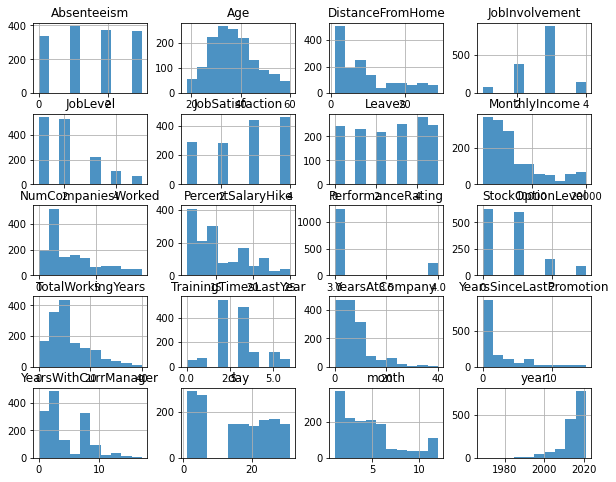

In [91]:
df.hist(alpha=.8, figsize=(10,8))

###  Univariate Analysis

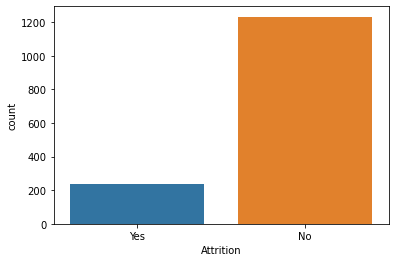

In [92]:
p = sns.countplot(x=df['Attrition'], data=df) 

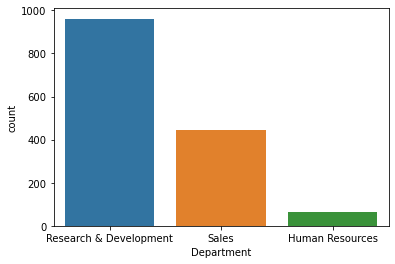

In [93]:
p = sns.countplot(x=df['Department'], data=df) 

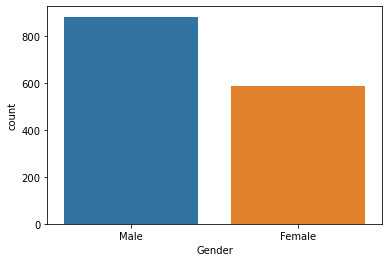

In [94]:
p = sns.countplot(x=df['Gender'], data=df) 

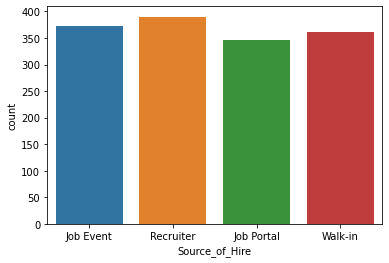

In [95]:
p = sns.countplot(x=df['Source_of_Hire'], data=df) 

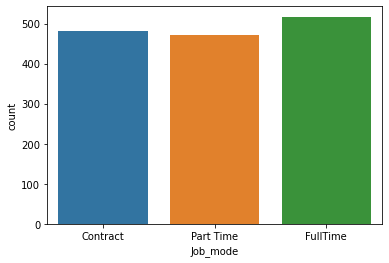

In [96]:
p = sns.countplot(x=df['Job_mode'], data=df) 

###  Bivariate Analysis

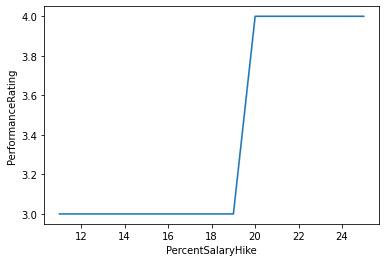

In [97]:
sns.lineplot(data=df, x="PercentSalaryHike", y="PerformanceRating")

## Scatter Plot

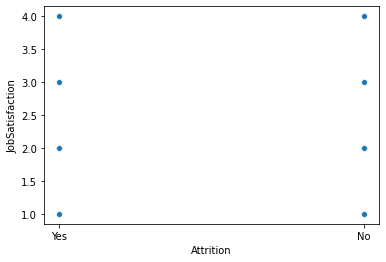

In [98]:
sns.scatterplot(data=df, y="JobSatisfaction", x="Attrition")

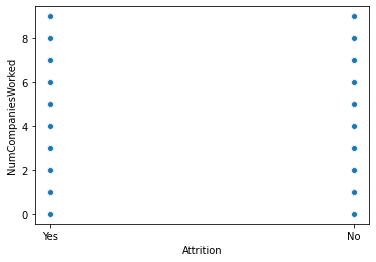

In [99]:
sns.scatterplot(data=df, y="NumCompaniesWorked", x="Attrition")

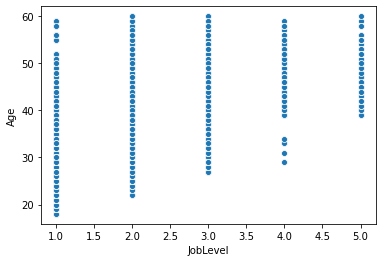

In [100]:
sns.scatterplot(data=df, x="JobLevel", y="Age")

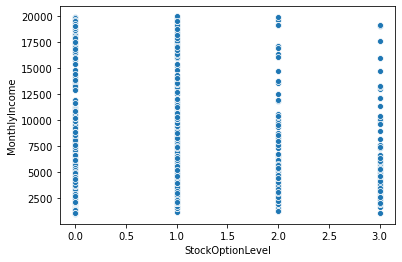

In [101]:
sns.scatterplot(data=df, y="MonthlyIncome", x="StockOptionLevel")

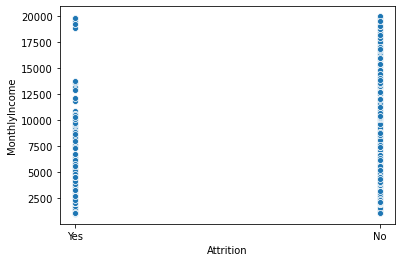

In [102]:
sns.scatterplot(data=df, y="MonthlyIncome", x="Attrition")

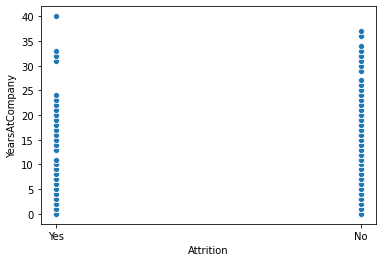

In [103]:
sns.scatterplot(data=df, y="YearsAtCompany", x="Attrition")

### Trivariate Analysis

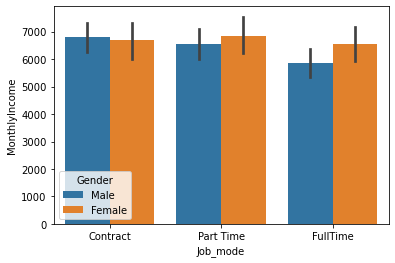

In [104]:
sns.barplot(y="MonthlyIncome",
           x="Job_mode",
           hue="Gender",
           data= df)

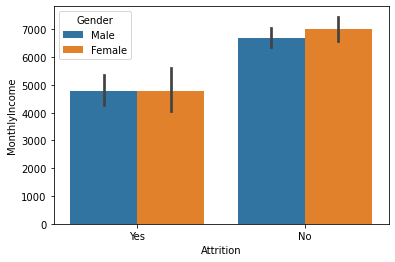

In [105]:
sns.barplot(y="MonthlyIncome",
           x="Attrition",
           hue="Gender",
           data= df)

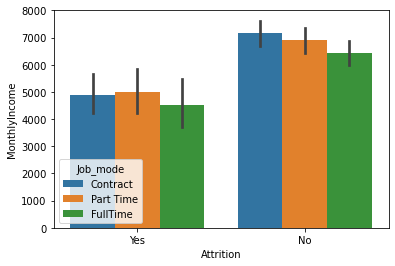

In [106]:
sns.barplot(y="MonthlyIncome",
           x="Attrition",
           hue="Job_mode",
           data= df)

## Pandas Profling ( HTML output)

In [107]:
!pip install pandas-profiling

In [135]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## STEP 4

### Questions

## Q1 - Is the dataset imbalanced or balanced wrt the target variable?


## Q2 - Is the dataset good to implement an ML algorithm?


## Q3 - Were there any missing values in your dataset? How did you handled them & what was the reason behind choosing that technique?


## Q4 - Are the categorical features like gender, Job_mode creating affecting attrition(target variable)?


## STEP 5 

## Model Building

In [110]:
# Importing Models
!pip install xgboost
!pip install lightgbm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### Encoding categorical Columns 

In [111]:
## We need to change categorical columns in numerical column before we fit any model

In [112]:
# Getting names of all the categorical columns
df.select_dtypes(include=['object']).columns.tolist()

['Attrition',
 'BusinessTravel',
 'Department',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Higher_Education',
 'Date_of_Hire',
 'Status_of_leaving',
 'Mode_of_work',
 'Work_accident',
 'Source_of_Hire',
 'Job_mode']

In [113]:
## Encoding the categorical features
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
encoded_df = pd.get_dummies(df, columns = [
 'BusinessTravel',
 'Department',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Higher_Education',
 'Date_of_Hire',
 'Status_of_leaving',
 'Mode_of_work',
 'Work_accident',
 'Source_of_Hire',
 'Job_mode'])

In [114]:
# Dataframe after encoding all the categorical variables
encoded_df

,Age,Attrition,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,Mode_of_work_WFH,Work_accident_No,Work_accident_Yes,Source_of_Hire_Job Event,Source_of_Hire_Job Portal,Source_of_Hire_Recruiter,Source_of_Hire_Walk-in,Job_mode_Contract,Job_mode_FullTime,Job_mode_Part Time
0,37,1,2,2,1,3,2090,6,15,3,...,0,1,0,1,0,0,0,1,0,0
1,21,0,15,3,1,4,1232,1,14,3,...,1,1,0,0,0,1,0,0,0,1
2,45,0,6,3,3,1,13245,4,14,3,...,1,1,0,1,0,0,0,1,0,0
3,23,0,2,3,1,1,2322,3,13,3,...,0,0,1,0,0,1,0,0,1,0
4,22,0,15,3,1,4,2871,1,15,3,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,3,2,4,1,16856,1,11,3,...,0,1,0,0,1,0,0,0,0,1
1466,55,0,1,3,5,1,19045,0,14,3,...,1,1,0,0,0,0,1,0,1,0
1467,55,0,26,2,5,4,19586,1,21,4,...,0,1,0,0,0,1,0,0,0,1
1468,58,0,10,3,4,3,13872,0,13,3,...,1,0,1,1,0,0,0,0,0,1


In [115]:
# Splitting the features from target feature 
y = encoded_df["Attrition"]
X = encoded_df.drop(["Attrition"], axis=1)

In [116]:
# performing startified sampling due to imbalanced dataset
# another option could have been the upsampling technique
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [117]:
#checking test train shape
names =[X_train,X_test,y_train,y_test]
for name in names:
    print(name.shape)

(1176, 1174)
(294, 1174)
(1176,)
(294,)


In [118]:
# XGB Classifier
model = XGBClassifier()
# fit the model with the training data
model.fit(X_train,y_train)

[10:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
# predict the target on the train dataset
predict_train = model.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print("Accuracy on train data-", accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
# Accuray Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print("Accuracy on test data-", accuracy_test)

Accuracy on train data- 1.0
Accuracy on test data- 0.8469387755102041


In [120]:
# LGBM Classifier
model = LGBMClassifier()
# fit the model with the training data
model.fit(X_train,y_train)

LGBMClassifier()

In [121]:
# predict the target on the train dataset
predict_train = model.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print("Accuracy on train data-", accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuray Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print("Accuracy on test data-", accuracy_test)

Accuracy on train data- 1.0
Accuracy on test data- 0.8639455782312925


In [122]:
# RF Classifier
model = RandomForestClassifier()
# fit the model with the training data
model.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
# predict the target on the train dataset
predict_train = model.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print("Accuracy on train data-", accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuray Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print("Accuracy on test data-", accuracy_test)

Accuracy on train data- 1.0
Accuracy on test data- 0.8435374149659864


In [124]:
# Adaboost Classifier
model = AdaBoostClassifier()
# fit the model with the training data
model.fit(X_train,y_train)

AdaBoostClassifier()

In [125]:
# predict the target on the train dataset
predict_train = model.predict(X_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print("Accuracy on train data-", accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuray Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print("Accuracy on test data-", accuracy_test)

Accuracy on train data- 0.9030612244897959
Accuracy on test data- 0.8503401360544217


In [129]:
predict_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [130]:
y_test

618     0
1384    0
422     0
1404    0
1193    0
       ..
540     1
688     1
1450    0
300     0
245     1
Name: Attrition, Length: 294, dtype: int32

In [126]:
## For fine tuning our model we can perform Hyperparameter tuning on the model which is giving best accuracy eg RandomForest

## Saving/Loading our model for future use

In [127]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [128]:
load_model = pickle.load(open(filename, 'rb'))

In [131]:
predict_test = load_model.predict(X_test)

In [132]:
predict_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])